In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import os


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_load = "./mouse_drug_data.csv"
clinical_data_load = "./clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_load)
clinical_data = pd.read_csv(clinical_data_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor= combined_data.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)

# Preview DataFrame
mean_tumor_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [23]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tum_error = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tum_error_df = pd.DataFrame(standard_error)

# Preview DataFrame
standard_error_df.head()


Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
dtype: float64

In [27]:
# Minor Data Munging to Re-Format the Data Frames
mean_format = mean_tumor_df.reset_index()
mean_pivot = mean_format.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

error_reformat = tum_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
mean_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [30]:
#plot table
drug_response = pd.pivot_table(combined_data, index=["Timepoint"], values="Tumor Volume (mm3)", columns=["Drug"], aggfunc=np.mean)
drug_response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


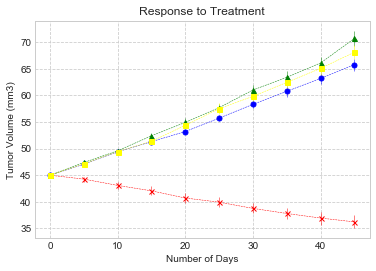

In [38]:
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(6,4))

plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], yerr=error_pivot["Capomulin"],\
             color="red", marker="x", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Infubinol"], yerr=error_pivot["Infubinol"],\
             color="blue", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Ketapril"],yerr=error_pivot["Ketapril"],\
             color="green", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Placebo"],yerr=error_pivot["Placebo"],\
             color="yellow", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Response to Treatment")
plt.xlabel("Number of Days")
plt.ylabel("Tumor Volume (mm3)")

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the figure
plt.savefig("ResponseToTreatment.png")

# Show the plot
plt.show()

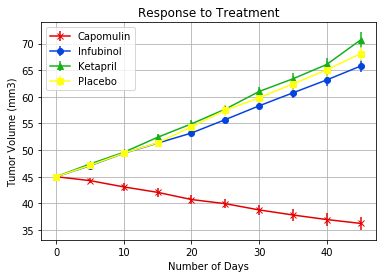

In [7]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(x_axis, capomulin_mean, yerr = capomulin_sem, marker = "x", color='xkcd:red', label="Capomulin")
ax.errorbar(x_axis, infubinol_mean, yerr = infubinol_sem, marker = "o", color='xkcd:blue', label = "Infubinol")
ax.errorbar(x_axis, ketapril_mean, yerr = ketapril_sem, marker = "^", color='xkcd:green',label = "Ketapril")
ax.errorbar(x_axis, placebo_mean, yerr = placebo_sem, marker = "s", color='xkcd:yellow', label = "Placebo")

plt.ylabel("Tumor Volume (mm3)")     
plt.xlabel("Number of Days")

plt.legend()
plt.grid()
plt.title("Response to Treatment")

# Save the Figure
plt.savefig("./response_to_treatment.png")

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [39]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_site = combined_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_metas_site_df = pd.DataFrame(mean_metastatic_site)

# Preview DataFrame
mean_metastatic_site_df.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [40]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_standard_error = combined_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
meta_standard_error_df = pd.DataFrame(meta_standard_error)

# Preview DataFrame
meta_standard_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [42]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_reformat = mean_metastatic_site_df.reset_index()
meta_mean_pivot = meta_mean_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

meta_sderror_reformat = meta_standard_error_df.reset_index()
meta_sderror_pivot = meta_sderror_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


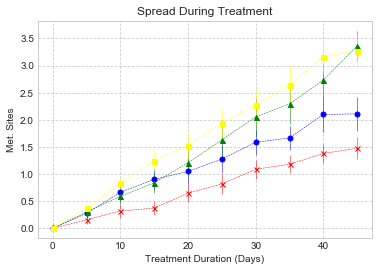

In [47]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Capomulin"], yerr=meta_sderror_pivot["Capomulin"],\
             color="red", marker="x", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Infubinol"], yerr=meta_sderror_pivot["Infubinol"],\
             color="blue", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Ketapril"],yerr=meta_sderror_pivot["Ketapril"],\
             color="green", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Placebo"],yerr=meta_sderror_pivot["Placebo"],\
             color="yellow", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)


plt.title('Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=10, fancybox=True)


# Save the Figure
plt.savefig("SpreadDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [50]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
num_mice = combined_data.groupby(["Drug", "Timepoint"]).count()['Mouse ID']

# Convert to DataFrame
num_mice_df = pd.DataFrame({"Mouse Count": num_mice})

# Preview DataFrame
num_mice_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [51]:
# Minor Data Munging to Re-Format the Data Frames
num_mice_reformat = num_mice_df.reset_index()
mice_pivot = num_mice_reformat.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
mice_pivot.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


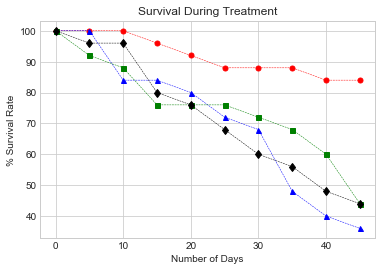

In [52]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival During Treatment") # Give plot main title
plt.ylabel("% Survival Rate") # set text for the y axis
plt.xlabel("Number of Days") # set text for the x axis
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# save the figure 
plt.savefig("SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [53]:
# Calculate the percent changes for each drug
drug_pct_change =  100 * (mean_pivot.iloc[-1] - mean_pivot.iloc[0]) / mean_pivot.iloc[0]
drug_pct_change_sem =  100 * (error_pivot.iloc[-1] - error_pivot.iloc[0]) / error_pivot.iloc[0]

# Display the data to confirm
drug_pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

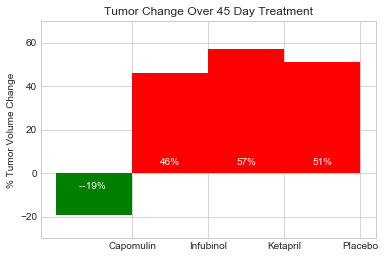

In [54]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (drug_pct_change["Capomulin"], 
               drug_pct_change["Infubinol"], 
               drug_pct_change["Ketapril"], 
               drug_pct_change["Placebo"])



# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")


# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Tumor_Change.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)